In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
concentration_t

513.1035583719581

In [8]:
def concentration_at_time_t(t, ACH, conc_t_0, conc_bgd):
    """
    Characterizing the performance of a do-it-yourself (DIY) box fan air filter.
    https://www.tandfonline.com/doi/pdf/10.1080/02786826.2022.2054674
    
    I changed t to be in seconds here instead of in hours.
    
    See Materials & Methods section
    """
    
    return conc_bgd + conc_t_0 * np.exp(-ACH * t / 3600)

In [9]:
def alternate_concentration_at_time_t(t, ACH, conc_t_0, conc_bgd):
    """
    The first term -- conc_bgd -- is the background concentration. Concentration in 
    an exponential decay situation cannot be less than the concentration background.
    
    The second term will have a maximum height of conc_t_0 - conc_bgd
    """
    return conc_bgd + (conc_t_0 - conc_bgd) * np.exp(-ACH * t / 3600)

In [17]:
parameters = {
    'conc_t_0': 500,
    'conc_bgd': 100,
    'ACH': 5,
    't': 10,
}

In [18]:
concentration_at_time_t(**parameters)

593.1035583719581

In [19]:
alt_concentration_t

473.3794160370798

The concentration at a later time in a situation where no aerosol generation is taking place -- only removal is happening -- should have a concentration that is lower than or equal to the initial concentration. `concentration_at_time_t` as implemented above leads to a higher concentration than the initial 500, so it must be incorrect. On the other hand, the alternate implementation produces data that is in line with expectations, so it's more likely to be correct.

In [20]:
copy = dict(parameters)
copy['t'] = np.arange(3600)

Text(0.5, 1.0, 'Particle decay: Two equations')

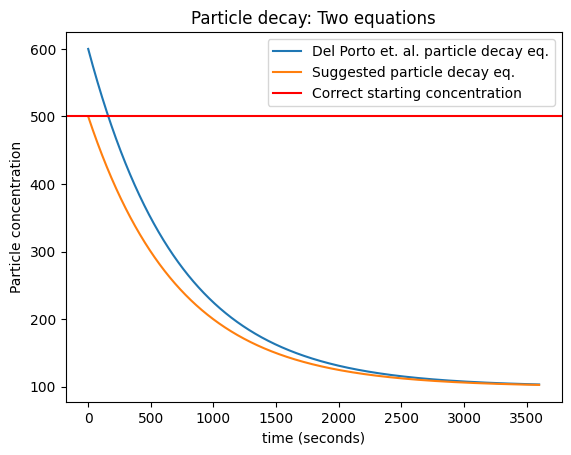

In [29]:
fig, ax = plt.subplots()
pd.Series(concentration_at_time_t(**copy)).plot(ax=ax)
pd.Series(alternate_concentration_at_time_t(**copy)).plot(ax=ax)
ax.axhline(500, color='r')
ax.legend(["Del Porto et. al. particle decay eq.", "Suggested particle decay eq.", "Correct starting concentration"])
ax.set_xlabel("time (seconds)")
ax.set_ylabel("Particle concentration")
ax.set_title("Particle decay: Two equations")